In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import fun.my_functions as mf
from molmass import Formula

In [2]:
data = np.load('../data/jica_datarequest_nr9.npz')
a = data['pipeline_version']
b = data['dataproductnr']
time = data['time']
full_data = data['n2']
full_data = 0.1 * full_data

reduced_data = np.vstack((
    full_data[:-1, :] - full_data[1:, :],
    (full_data[:-1, :] - full_data[1:, :])[-1,:]))

In [3]:
negative_masses = np.array([12.0111, 13.019200000000001, 14.0273, 15.035400000000001, 16.0435, 
                            17.0516, 24.0222, 25.0303, 26.038400000000003, 27.0465, 28.0546, 
                            29.0627, 31.0789, 37.0414, 38.0495, 39.05760000000001, 
                            40.06570000000001, 41.073800000000006, 42.081900000000005, 43.09, 
                            44.0981, 45.1062, 49.0525, 50.0606, 51.06870000000001, 
                            53.084900000000005, 55.1011, 57.1173, 0.00055])


en_table = np.loadtxt('../data/energy_calibration_jica.txt')   
U_prel = np.load('../data/jica_datarequest_nr10.npz')['scpot'][0]
v_prel = np.load('../data/jica_datarequest_nr7.npz')['speed'][0] * 1e3

negative_energies = mf.calc_energy(negative_masses, U_prel, v_prel)

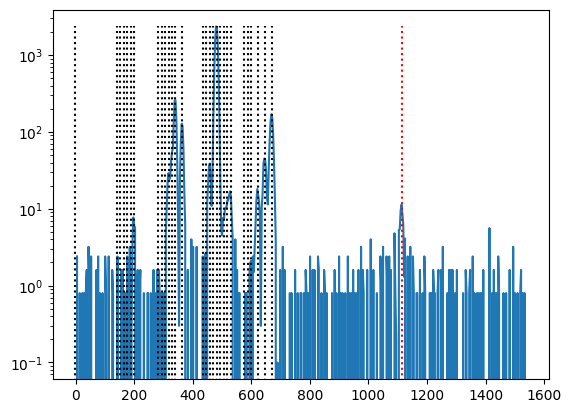

In [4]:
plt.plot(en_table[:,1],  reduced_data[:, 0])
ymin= np.min(reduced_data[:, 0])
ymax= np.max(reduced_data[:, 0])
#for i in negative_energies:
plt.vlines(negative_energies, color ='k', linestyle = 'dotted', ymin=ymin, ymax=ymax)
plt.vlines(mf.calc_energy(94.9401, U_prel, v_prel), color = 'red', linestyle = 'dotted', ymin=ymin, ymax=ymax)
plt.yscale('log')
plt.show()


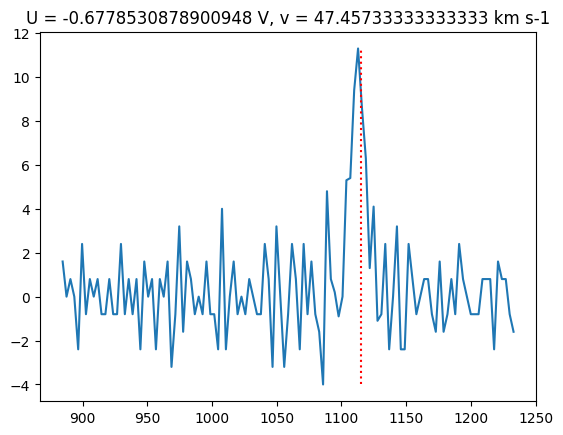

Energy offset is 2.585570822484897


In [5]:
# identify offset, here we are using negative biomarker to find the offset
energy_offset = en_table[293:410]
reduced_data_offset = reduced_data[293:410, 0]
ymin=np.min(reduced_data_offset)
ymax=np.max(reduced_data_offset)
plt.plot(energy_offset[:,1], reduced_data_offset)
plt.title(f'U = {U_prel} V, v = {v_prel/1e3} km s-1')
plt.vlines(mf.calc_energy(94.9401, U_prel, v_prel), color = 'red', linestyle = 'dotted', ymin=ymin, ymax=ymax)
plt.show()
print(f'Energy offset is {mf.calc_energy(94.9401, U_prel, v_prel) - energy_offset[np.argmax(reduced_data_offset), 1]}')

I turned the above into a function called energy_calibration()

In [6]:
test_arr = mf.energy_calibration('n')
plt.close('all')

1


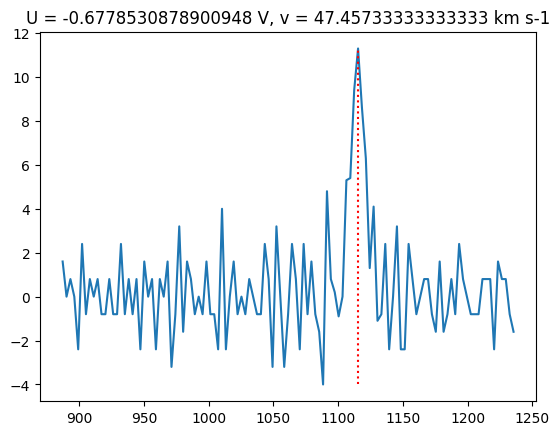

In [8]:
energy_offset = test_arr[293:410]
reduced_data_offset = reduced_data[293:410, 0]
ymin=np.min(reduced_data_offset)
ymax=np.max(reduced_data_offset)
plt.plot(energy_offset, reduced_data_offset)
plt.title(f'U = {U_prel} V, v = {v_prel/1e3} km s-1')
plt.vlines(mf.calc_energy(94.9401, U_prel, v_prel), color = 'red', linestyle = 'dotted', ymin=ymin, ymax=ymax)
plt.show()

# Now repeating for positive instrument

In [9]:
data = np.load('../data/jica_datarequest_nr8.npz')
full_data = data['p1']

reduced_data = np.vstack((
    full_data[:-1, :] - full_data[1:, :],
    (full_data[:-1, :] - full_data[1:, :])[-1,:]))

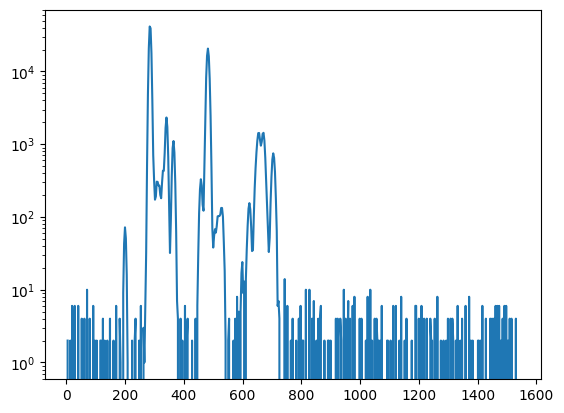

In [11]:
plt.plot(en_table[:,1], reduced_data)
plt.yscale('log')

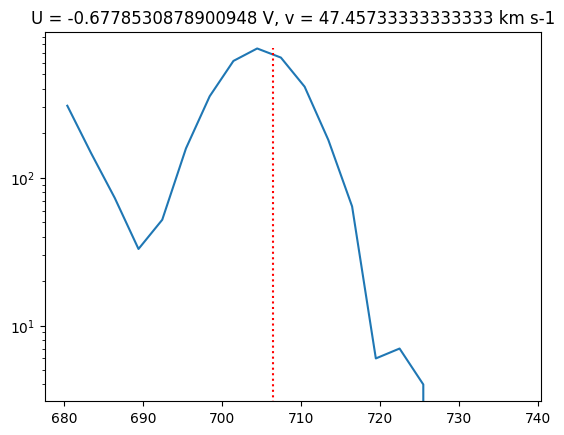

Energy offset is 1.9442718502446041


In [12]:
energy_offset = en_table[225:245, 1]
reduced_data_offset = reduced_data[225:245]
ymin=np.min(reduced_data_offset)
ymax=np.max(reduced_data_offset)
plt.plot(energy_offset, reduced_data_offset)
plt.title(f'U = {U_prel} V, v = {v_prel/1e3} km s-1')
plt.vlines(mf.calc_energy(60.03, U_prel, v_prel, instrument='p'), color = 'red', linestyle = 'dotted', ymin=ymin, ymax=ymax)
plt.yscale('log')
plt.show()
print(f'Energy offset is {mf.calc_energy(60.03, U_prel, v_prel, instrument='p') - energy_offset[np.argmax(reduced_data_offset)]}')

In [13]:
test_arr = mf.energy_calibration('p')
plt.close('all')

1


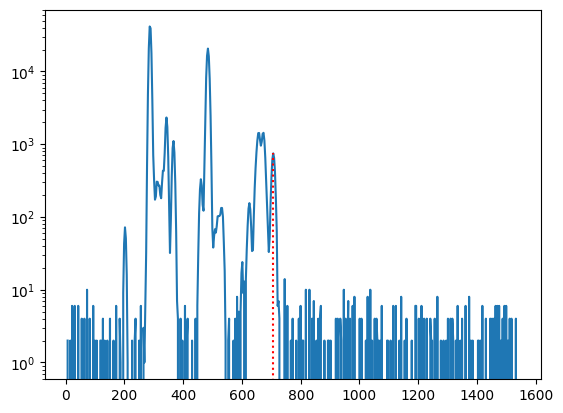

In [15]:
plt.plot(test_arr, reduced_data)
plt.yscale('log')
plt.vlines(mf.calc_energy(60.03, U_prel, v_prel, instrument='p'), color = 'red', linestyle = 'dotted', ymin=ymin, ymax=ymax)